<a href="https://colab.research.google.com/github/NaderJS/hacknotebooks/blob/master/machathon_filteration.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Machathon Filteration
https://www.kaggle.com/c/machathon-10-filteration-test 

team name: Data Wizard

In [ ]:
"""
I this is the download address of the data file

"""
!wget "https://storage.googleapis.com/kaggle-competitions-data/kaggle-v2/18668/951082/bundle/archive.zip?GoogleAccessId=web-data@kaggle-161607.iam.gserviceaccount.com&Expires=1620270180&Signature=N6TLZp%2FTrxUxWpG4wbt8WXkdpyFk5W5xX22%2BzgZF9Dffe3oXcM4HAbPzh%2Fe7ksXTkhMK5MXvJa9AtOil1Ziul865PdGQaPJC%2B0m3dNKocFX8r8S7rAbBgXbmG3NzqXpZdVaW35PaJYFc2VBw45FTCdJiRNLvoUJ0jE%2FdAzGsKNQpLQQYOFgIYSzpXRAjQdj3ORcG1Tr5AYIWRC8dnXZjnoGmr76wkXcoOEiNvJMStoisqKtpHpkQ4zlIqiuoQe8KY2cdiklWcIY7Omu2srvu7RnwrwhOdCupraJa5q6ny0niABtM%2BPUHMnGsUs2j2bjatjKPwojC%2BekciNvuM0%2B%2BCg%3D%3D&response-content-disposition=attachment%3B+filename%3Dmachathon-10-filteration-test.zip"

In [ ]:
"""
unzipping the file
"""
!unzip  "/content/archive.zip?GoogleAccessId=web-data@kaggle-161607.iam.gserviceaccount.com&Expires=1620270180&Signature=N6TLZp%2FTrxUxWpG4wbt8WXkdpyFk5W5xX22+zgZF9Dffe3oXcM4HAbPzh%2Fe7ksXTkhMK5MXvJa9AtOil1Ziul865PdGQaPJC+0m3dNKocFX8r8S7rAbBgXbmG3NzqXpZd"

In [ ]:
!pip install catboost

In [6]:
import pandas as pd
import numpy as np
from catboost import CatBoostRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split
from catboost import Pool

# from sklearn.preprocessing import StandardScaler



In [7]:
!pip install bayesian-optimization

  Created wheel for bayesian-optimization: filename=bayesian_optimization-1.2.0-cp37-none-any.whl size=11687 sha256=2f080b6c119a06cd8b9bc51d48fcb406636e5cad2be45138947ca28030944456
  Stored in directory: /root/.cache/pip/wheels/5a/56/ae/e0e3c1fc1954dc3ec712e2df547235ed072b448094d8f94aec
Successfully built bayesian-optimization


In [8]:
traindata = pd.read_csv("./train.csv")

In [9]:
traindata.head()

,Unnamed: 0,WellID,FirstMonthOil,FirstMonthGas,FirstMonthRatioGasOil,FirstMonthWater,firstMonthPercentWater,FirstMonthDaysOn,SecondMonthOil,SecondMonthGas,SecondMonthRatioGasOil,SecondMonthWater,SecondMonthPercentWater,SecondMonthDaysOn,ThirdMonthOil,ThirdMonthGas,ThirdMonthRatioGasOil,ThirdMonthWater,ThirdMonthPercentWater,ThirdMonthDaysOn,FourthMonthOil,FourthMonthGas,FourthMonthRatioGasOil,FourthMonthWater,FourthMonthPercentWater,FourthMonthDaysOn,FifthMonthOil,FifthMonthGas,FifthMonthRatioGasOil,FifthMonthWater,FifthMonthPercentWater,FifthMonthDaysOn,SixthMonthOil,SixthMonthGas,SixthMonthRatioGasOil,SixthMonthWater,SixthMonthPercentWater,SixthMonthDaysOn,TotalOilInNext6Months,TotalGasInNext6Months
0,3,5343,22672.0,3818.0,0.168402,14759.0,0.650979,30.0,12766.0,2308.0,0.180793,7921.0,0.620476,28.0,4990.0,607.0,0.121643,2330.0,0.466934,10.0,11002.0,1419.0,0.128977,6576.0,0.597710,31.0,7141.0,506.0,0.070858,4451.0,0.623302,22.0,6516.0,479.0,0.073511,4075.0,0.625384,27.0,61152.0,5893.0
1,4,5663,7919.0,4328.0,0.546534,5278.0,0.666498,20.0,5082.0,2779.0,0.546832,2402.0,0.472649,28.0,3168.0,540.0,0.170455,1683.0,0.531250,25.0,2774.0,283.0,0.102019,1172.0,0.422495,30.0,1925.0,378.0,0.196364,782.0,0.406234,24.0,2015.0,1195.0,0.593052,796.0,0.395037,23.0,13172.0,7529.0
2,8,7697,18653.0,0.0,0.000000,9585.0,0.513858,30.0,13372.0,23154.0,1.731529,0.0,0.000000,31.0,12189.0,19935.0,1.635491,3665.0,0.300681,30.0,10034.0,16316.0,1.626071,2913.0,0.290313,31.0,11982.0,23337.0,1.947672,4137.0,0.345268,30.0,9070.0,18020.0,1.986770,3102.0,0.342007,31.0,32858.0,57060.0
3,9,7394,19784.0,33837.0,1.710321,9433.0,0.476799,30.0,17166.0,27167.0,1.582605,6641.0,0.386869,31.0,16525.0,22777.0,1.378336,5927.0,0.358669,30.0,13113.0,18209.0,1.388622,4568.0,0.348357,31.0,9202.0,11550.0,1.255162,3504.0,0.380787,31.0,6102.0,8675.0,1.421665,2145.0,0.351524,18.0,31784.0,45579.0
4,10,7318,16157.0,21461.0,1.328279,7529.0,0.465990,30.0,12263.0,14664.0,1.195792,5728.0,0.467096,31.0,11019.0,14039.0,1.274072,4518.0,0.410019,30.0,14154.0,19746.0,1.395083,5486.0,0.387594,31.0,4046.0,4337.0,1.071923,1627.0,0.402126,14.0,0.0,2941.0,0.000000,0.0,0.000000,1.0,40715.0,59066.0


In [10]:
traindata.drop(["Unnamed: 0","WellID"],axis=1,inplace=True)

In [11]:
y = traindata["TotalOilInNext6Months"]
X = traindata.drop("TotalOilInNext6Months",axis=1)

In [12]:
traindata.describe()

,FirstMonthOil,FirstMonthGas,FirstMonthRatioGasOil,FirstMonthWater,firstMonthPercentWater,FirstMonthDaysOn,SecondMonthOil,SecondMonthGas,SecondMonthRatioGasOil,SecondMonthWater,SecondMonthPercentWater,SecondMonthDaysOn,ThirdMonthOil,ThirdMonthGas,ThirdMonthRatioGasOil,ThirdMonthWater,ThirdMonthPercentWater,ThirdMonthDaysOn,FourthMonthOil,FourthMonthGas,FourthMonthRatioGasOil,FourthMonthWater,FourthMonthPercentWater,FourthMonthDaysOn,FifthMonthOil,FifthMonthGas,FifthMonthRatioGasOil,FifthMonthWater,FifthMonthPercentWater,FifthMonthDaysOn,SixthMonthOil,SixthMonthGas,SixthMonthRatioGasOil,SixthMonthWater,SixthMonthPercentWater,SixthMonthDaysOn,TotalOilInNext6Months,TotalGasInNext6Months
count,9324.000000,9324.000000,9324.000000,9.324000e+03,9324.000000,9324.000000,9324.000000,9324.000000,9324.000000,9.324000e+03,9324.000000,9324.000000,9324.000000,9324.000000,9324.000000,9.324000e+03,9324.000000,9324.000000,9324.000000,9324.000000,9324.000000,9324.000000,9324.000000,9324.000000,9324.000000,9324.000000,9324.000000,9324.000000,9324.000000,9324.000000,9324.000000,9324.000000,9324.000000,9324.000000,9324.000000,9324.000000,9324.000000,9.324000e+03
mean,10975.998391,23654.428142,36.483768,7.050517e+03,0.793089,19.624303,7361.601459,19751.486808,71.088354,3.985776e+03,0.719347,19.085800,5917.555019,17147.918168,22.511987,3.263830e+03,0.719102,18.774346,5206.465251,15410.326362,11.778866,2982.964715,0.733901,18.914200,4615.480266,14014.701952,25.640350,2715.161090,0.739190,18.994316,4239.232947,12985.894466,21.405811,2551.490562,0.763946,19.130309,19742.820249,6.355971e+04
std,8091.976505,35067.286099,891.599302,1.800020e+04,5.943600,13.369777,5960.634208,30780.151750,1865.962676,1.440518e+04,3.212954,13.493335,4895.693768,27350.194074,507.117402,1.270589e+04,2.923105,13.504617,4342.544054,23895.626766,198.644846,11494.973825,3.796721,13.641073,3889.654536,21561.736081,734.585937,9831.307311,3.002129,13.670981,3618.018873,19470.328468,601.380057,8158.773532,3.272239,13.737993,15678.751814,9.197275e+04
min,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00
25%,5140.500000,5928.000000,0.664069,0.000000e+00,0.000000,0.000000,3057.750000,4207.750000,0.671820,0.000000e+00,0.000000,0.000000,2415.250000,3606.750000,0.691011,0.000000e+00,0.000000,0.000000,2065.750000,3385.750000,0.685409,0.000000,0.000000,0.000000,1834.750000,3081.500000,0.689508,0.000000,0.000000,0.000000,1628.000000,2930.500000,0.702584,0.000000,0.000000,0.000000,8073.250000,1.690325e+04
50%,9281.000000,13158.000000,1.151556,4.115000e+03,0.345983,28.000000,6039.000000,10200.000000,1.257137,2.158500e+03,0.282594,28.000000,4860.000000,8482.000000,1.304684,1.554000e+03,0.258139,27.000000,4277.500000,7683.000000,1.325213,1297.000000,0.248840,28.000000,3768.500000,7011.500000,1.355228,1173.500000,0.250708,28.000000,3433.500000,6542.000000,1.412128,1077.000000,0.250451,28.000000,16437.000000,3.321850e+04
75%,15075.500000,26262.500000,2.745121,1.019175e+04,0.935886,30.000000,10172.250000,22444.250000,3.433525,5.748500e+03,0.789590,30.000000,8097.250000,19500.000000,3.734243,4.682250e+03,0.768735,30.000000,7175.250000,17762.750000,4.072924,4229.250000,0.754927,30.000000,6379.000000,16241.250000,4.288935,3912.500000,0.775836,31.000000,5938.250000,15021.750000,4.593442,3674.250000,0.797680,31.000000,27737.500000,7.100925e+04
max,64499.000000,476177.000000,55789.500000,1.451478e+06,527.666667,31.000000,54790.000000,481633.000000,115698.000000,1.226836e+06,169.292402,31.000000,52654.000000,395168.000000,36268.000000,1.100392e+06,141.005923,31.000000,46940.000000,384468.000000,15176.266667,970001.000000,215.562500,31.000000,36534.000000,361151.000000,53048.000000,825349.000000,129.594937

In [13]:
traindata.eq(0).sum()/len(traindata)

FirstMonthOil              0.003325
FirstMonthGas              0.036358
FirstMonthRatioGasOil      0.039575
FirstMonthWater            0.339768
firstMonthPercentWater     0.340519
FirstMonthDaysOn           0.302982
SecondMonthOil             0.030459
SecondMonthGas             0.036251
SecondMonthRatioGasOil     0.057701
SecondMonthWater           0.334728
SecondMonthPercentWater    0.336444
SecondMonthDaysOn          0.309095
ThirdMonthOil              0.030245
ThirdMonthGas              0.032604
ThirdMonthRatioGasOil      0.054376
ThirdMonthWater            0.325504
ThirdMonthPercentWater     0.326791
ThirdMonthDaysOn           0.308988
FourthMonthOil             0.035178
FourthMonthGas             0.033462
FourthMonthRatioGasOil     0.057164
FourthMonthWater           0.321214
FourthMonthPercentWater    0.323252
FourthMonthDaysOn          0.311776
FifthMonthOil              0.036894
FifthMonthGas              0.034535
FifthMonthRatioGasOil      0.059524
FifthMonthWater            0

In [14]:
xt,xp,yt,yp = train_test_split(X,y,shuffle=True)

In [15]:
rf= RandomForestRegressor(max_features=0.6,n_estimators=125,min_samples_leaf=7)
rf.fit(xt,yt)
vals = rf.predict(xp)
mean_absolute_error(yp,vals)

3198.466764568371

In [ ]:
from bayes_opt import BayesianOptimization as opt  
def traincat(learning_rate,max_depth,l2_leaf_reg,colsample_bylevel,subsample):
    cat =  CatBoostRegressor(random_state=42,learning_rate=learning_rate,subsample = subsample,iterations=2500,max_depth=int(round(max_depth)),l2_leaf_reg =l2_leaf_reg,colsample_bylevel=colsample_bylevel,eval_metric="MAE",early_stopping_rounds=500)
    valset = Pool(xp,yp)
    cat.fit(xt,yt,eval_set=valset,verbose=500)
    return -cat.best_score_["validation"]["MAE"]

bounds = {
    'max_depth':(5,10),
#     'min_rows':(10,30),
    'l2_leaf_reg':(0.1,0.8),
    'learning_rate':(0.001, 0.06),
#     'sample_rate':(0.5,0.8),
     'colsample_bylevel': (0.3,1),
    'subsample' : (0.7,1)
}

optimizer = opt(
    f=traincat,
    pbounds=bounds,
    random_state=1,
)
optimizer.maximize(init_points=10, n_iter=55)

In [24]:
optimizer.max

{'params': {'colsample_bylevel': 0.3646370163381584,
  'l2_leaf_reg': 0.23038214796436965,
  'learning_rate': 0.021388082895539815,
  'max_depth': 6.983837371153349,
  'subsample': 0.8616450202010071},
 'target': -2682.2087811496117}

In [26]:
cat = CatBoostRegressor(random_state=56,learning_rate=0.03078496171814678,subsample =  0.8616450202010071,iterations=4000,max_depth=int(round(6.983837371153349)),l2_leaf_reg =0.23038214796436965,colsample_bylevel=0.3646370163381584,eval_metric="MAE",early_stopping_rounds=900)
val_set=Pool(xp,yp)
cat.fit(xt,yt,eval_set=val_set,early_stopping_rounds=900,verbose=500)

0:	learn: 11680.7836381	test: 11347.8907190	best: 11347.8907190 (0)	total: 8.02ms	remaining: 32.1s
500:	learn: 2133.1251937	test: 2799.8697024	best: 2799.8697024 (500)	total: 3.34s	remaining: 23.4s
1000:	learn: 1542.9577456	test: 2705.9961910	best: 2705.9961910 (1000)	total: 6.63s	remaining: 19.9s
1500:	learn: 1202.7461084	test: 2680.8212086	best: 2680.7295194 (1470)	total: 9.95s	remaining: 16.6s
2000:	learn: 969.7259947	test: 2671.8558238	best: 2671.1240926 (1972)	total: 13.3s	remaining: 13.2s
2500:	learn: 794.6149316	test: 2668.7309136	best: 2668.7137919 (2498)	total: 16.6s	remaining: 9.95s
3000:	learn: 662.5306933	test: 2668.4135599	best: 2667.7389376 (2930)	total: 19.9s	remaining: 6.62s
3500:	learn: 557.9347907	test: 2668.1715013	best: 2667.2994495 (3398)	total: 23.1s	remaining: 3.3s
3999:	learn: 473.2737189	test: 2668.0480583	best: 2667.2994495 (3398)	total: 26.4s	remaining: 0us

bestTest = 2667.29945
bestIteration = 3398

Shrink model to first 3399 iterations.


In [27]:
cat.best_score_["validation"]["MAE"]

2667.299449521499

In [ ]:
test = pd.read_csv("./test.csv")
test.head()

,Unnamed: 0,WellID,FirstMonthOil,FirstMonthGas,FirstMonthRatioGasOil,FirstMonthWater,firstMonthPercentWater,FirstMonthDaysOn,SecondMonthOil,SecondMonthGas,SecondMonthRatioGasOil,SecondMonthWater,SecondMonthPercentWater,SecondMonthDaysOn,ThirdMonthOil,ThirdMonthGas,ThirdMonthRatioGasOil,ThirdMonthWater,ThirdMonthPercentWater,ThirdMonthDaysOn,FourthMonthOil,FourthMonthGas,FourthMonthRatioGasOil,FourthMonthWater,FourthMonthPercentWater,FourthMonthDaysOn,FifthMonthOil,FifthMonthGas,FifthMonthRatioGasOil,FifthMonthWater,FifthMonthPercentWater,FifthMonthDaysOn,SixthMonthOil,SixthMonthGas,SixthMonthRatioGasOil,SixthMonthWater,SixthMonthPercentWater,SixthMonthDaysOn,TotalGasInNext6Months
0,1,562,4548.0,15031.0,3.304969,7923.0,1.742084,31.0,4361.0,12504.0,2.867232,4257.0,0.976152,30.0,2911.0,8559.0,2.940227,2582.0,0.886980,31.0,2404.0,6081.0,2.529534,1822.0,0.757903,31.0,1925.0,4608.0,2.393766,1359.0,0.705974,30.0,1734.0,4000.0,2.306805,1282.0,0.739331,31.0,15321.0
1,2,16,15199.0,0.0,0.000000,0.0,0.000000,30.0,11067.0,0.0,0.000000,0.0,0.000000,31.0,154.0,183.0,1.188312,12.0,0.077922,1.0,3604.0,2493.0,0.691731,0.0,0.000000,15.0,10441.0,13457.0,1.288861,1197.0,0.114644,31.0,7212.0,20610.0,2.857737,0.0,0.000000,30.0,61855.0
2,5,5695,8664.0,6527.0,0.753347,2748.0,0.317175,17.0,6947.0,5068.0,0.729524,6802.0,0.979128,29.0,3470.0,2525.0,0.727666,2813.0,0.810663,19.0,1177.0,889.0,0.755310,963.0,0.818182,12.0,3216.0,1484.0,0.461443,2382.0,0.740672,17.0,507.0,392.0,0.773176,930.0,1.834320,5.0,12371.0
3,6,6185,14408.0,9223.0,0.640130,21573.0,1.497293,21.0,13753.0,8659.0,0.629608,15812.0,1.149713,31.0,7103.0,4863.0,0.684640,8190.0,1.153034,25.0,4873.0,3176.0,0.651755,5546.0,1.138108,20.0,6307.0,4311.0,0.683526,7129.0,1.130331,26.0,6849.0,4467.0,0.652212,7475.0,1.091400,31.0,23574.0
4,7,7919,10830.0,5868.0,0.541828,3749.0,0.346168,22.0,3712.0,1424.0,0.383621,5509.0,1.484106,24.0,4807.0,1991.0,0.414188,10489.0,2.182026,30.0,3703.0,2625.0,0.708885,7594.0,2.050770,30.0,6287.0,1160.0,0.184508,3562.0,0.566566,30.0,1648.0,473.0,0.287015,3207.0,1.945995,28.0,3220.0


In [ ]:
# # ids = test["WellID"]
# # test.drop(["WellID","Unnamed: 0"],axis=1,inplace=True)
# # preds = catress.predict(test)
# sub = {"WellID" : ids , "TotalOilInNext6Months" : (preds1-y.mean()*0.05)}
# sub = pd.DataFrame(sub)
# sub.to_csv("basecatboost.csv",index=False)

In [ ]:
# cat4 =  CatBoostRegressor(random_state=63,learning_rate=0.03078496171814678,subsample = 0.5066067900567058,iterations=2500,max_depth=int(round(5.941162788606626)),l2_leaf_reg =0.3240391456470025,colsample_bylevel=0.5063514233486307,eval_metric="MAE",early_stopping_rounds=500)
# # cat.fit(xt,yt,eval_set=Pool(xp,yp),verbose=500)

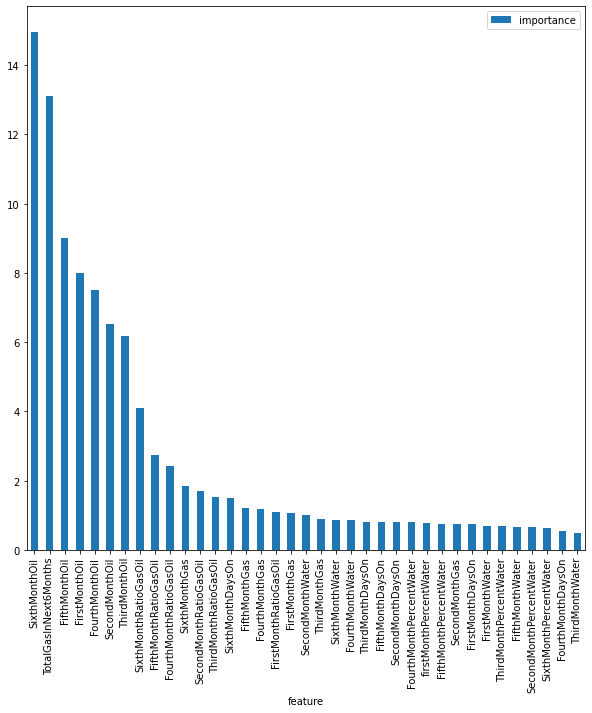

In [28]:
def Sort_Tuple(tup):      
    lst = len(tup)  
    for i in range(0, lst):  
          
        for j in range(0, lst-i-1):  
            if (tup[j][1] < tup[j + 1][1]):  
                temp = tup[j]  
                tup[j]= tup[j + 1]  
                tup[j + 1]= temp  
    return tup 
    
feature_importances =cat.get_feature_importance()
feature_importances = [(xt.columns[i],feature_importances[i])  for  i in range(len(feature_importances)) ]
# importances = cat.get_feature_importance()
 
feature_importances = Sort_Tuple(feature_importances)
df = pd.DataFrame(feature_importances, columns=['feature', 'importance'])
df.plot(kind='bar', x='feature',figsize=(10,10))
targetted= []
for i in range(25):
    targetted.append(feature_importances[i][0])
    
